In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [3]:
import sqlite3

db_path = "../db.sqlite3"
query = """
    select p.name, p.price, o.datetime, oi.quantity
    from restaurant_orderitem oi
    inner join restaurant_product p on p.id == oi.product_id
    inner join restaurant_order o on o.id == oi.order_id
"""

with sqlite3.connect(db_path) as db_conn:
    orders = pd.read_sql_query(query, db_conn)
    
orders.to_csv("restaurant_orders_data.csv", index=False)
    

In [32]:
df = pd.read_csv("restaurant_orders_data.csv")
df["datetime"] = pd.to_datetime(df["datetime"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      74818 non-null  object        
 1   price     74818 non-null  float64       
 2   datetime  74818 non-null  datetime64[ns]
 3   quantity  74818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [19]:
top_prod = df.groupby("name").agg({"quantity": "sum"}).sort_values("quantity", ascending=False).head(10)
top_prod.index.to_list()

['Plain Papadum',
 'Pilau Rice',
 'Plain Naan',
 'Garlic Naan',
 'Plain Rice',
 'Onion Bhajee',
 'Mango Chutney',
 'Chicken Tikka Masala',
 'Chapati',
 'Mint Sauce']

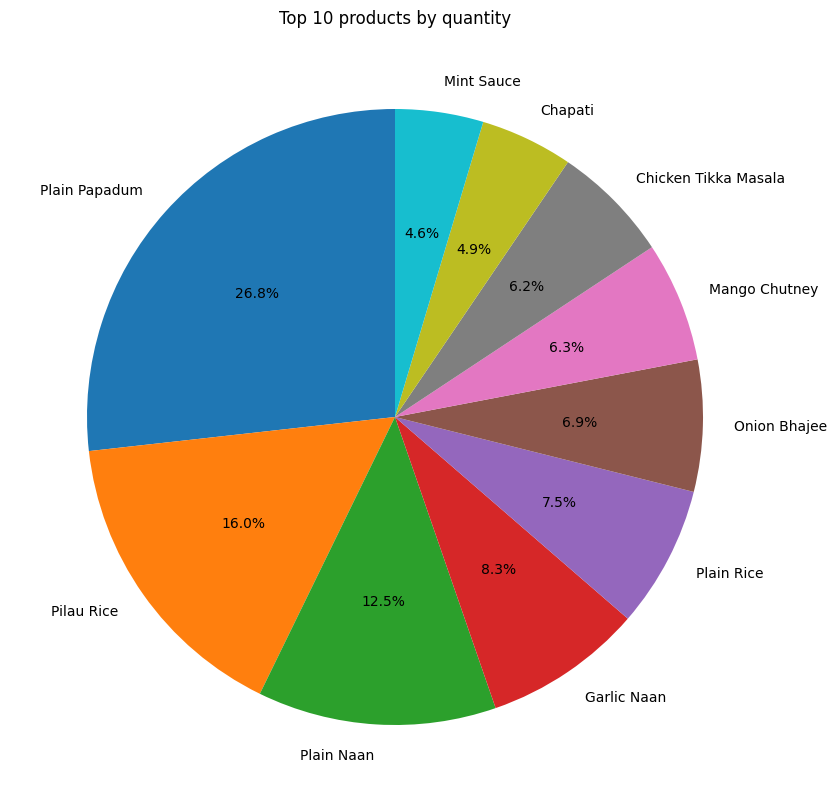

In [25]:
plt.figure(figsize=(10, 10))
plt.pie(top_prod["quantity"], labels=top_prod.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 products by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

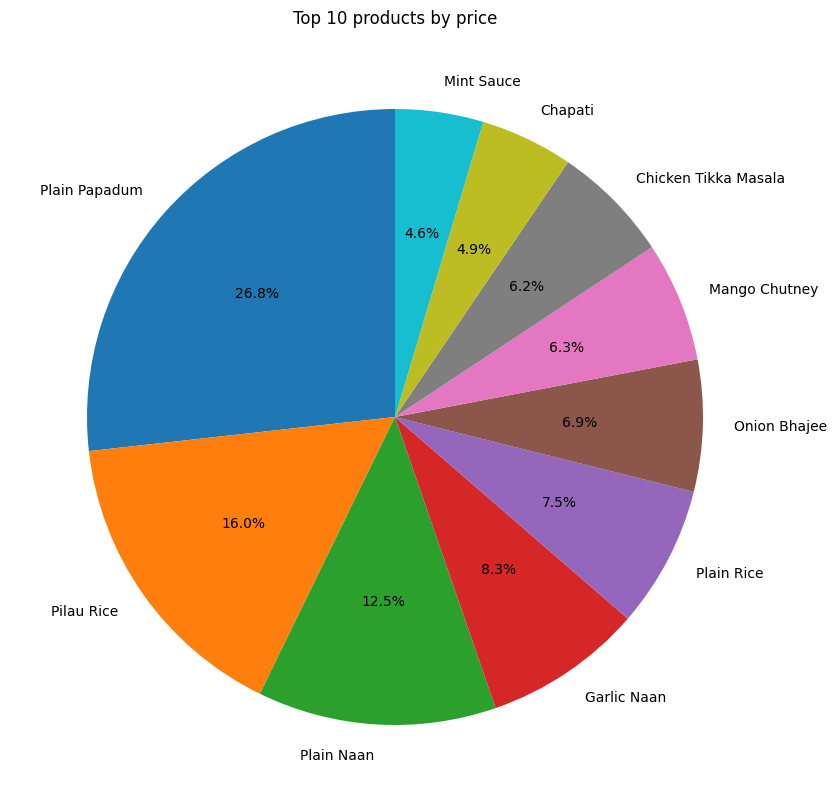

In [35]:
df["item_price"] = df["price"] * df["quantity"]

top_prod_by_price = df.groupby("name").agg({"item_price": "sum"}).sort_values("item_price", ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_prod["quantity"], labels=top_prod.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 10 products by price")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [36]:
df["order_hour"] = df["datetime"].dt.hour
income_by_hour = df.groupby("order_hour").agg({"item_price": "sum"})
income_by_hour

,item_price
order_hour,
0,177.95
1,54.65
2,199.25
3,8.90
4,63.45
5,57.40
6,121.60
8,447.70
9,570.60


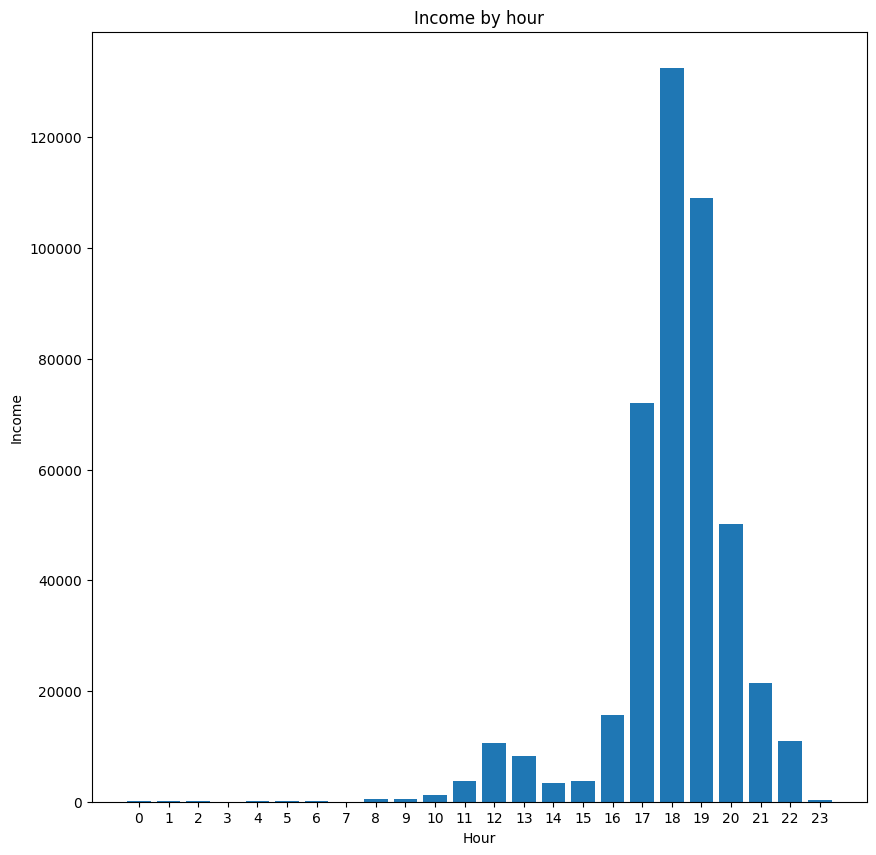

In [38]:
plt.figure(figsize=(10, 10))
plt.bar(income_by_hour.index, income_by_hour["item_price"])
plt.title("Income by hour")
plt.xlabel("Hour")
plt.ylabel("Income")
plt.xticks(np.arange(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [63]:
day_map = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["order_day"] = df["datetime"].dt.day_name()
income_by_day = df.groupby("order_day").agg({"item_price": "sum"}).reindex(day_map)
income_by_day

,item_price
order_day,
Monday,40008.30
Tuesday,38145.65
Wednesday,41246.20
Thursday,46021.55
Friday,100339.15
Saturday,112191.65
Sunday,67105.95


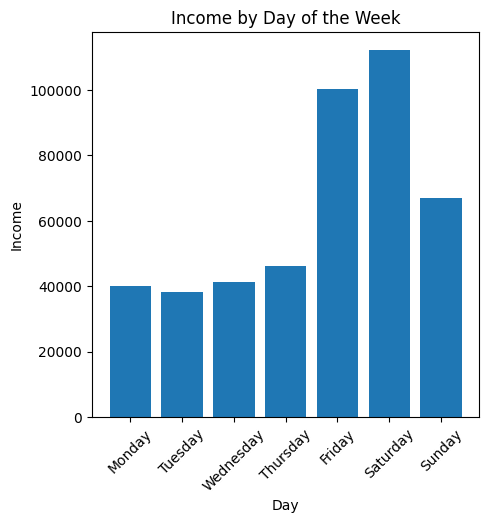

In [64]:
plt.figure(figsize=(5, 5))
plt.bar(income_by_day.index, income_by_day["item_price"])
plt.title('Income by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Income')
plt.xticks(rotation=45)

plt.show()